## Observations and Insights 

In [144]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_data_table = pd.merge(mouse_metadata, study_results, on = "Mouse ID", how = "left")
merge_data_table.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [111]:
# Checking the number of mice in the DataFrame.
merge_data_table["Mouse ID"].count()

1893

In [112]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
merge_data_table.duplicated().sum()

1

In [113]:
# Optional: Get all the data for the duplicate mouse ID. 
merge_data_table.loc[merge_data_table.duplicated(), :]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.0,0


In [114]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
new_data_table = merge_data_table.drop_duplicates()
new_data_table.shape 

(1892, 8)

In [115]:
# Checking the number of mice in the clean DataFrame.
new_data_table['Mouse ID'].count()

1892

In [142]:
new_data_table

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


## Summary Statistics

In [116]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.

In [117]:
mean = new_data_table.groupby("Drug Regimen")['Tumor Volume (mm3)'].mean()
median = new_data_table.groupby("Drug Regimen")['Tumor Volume (mm3)'].median()
variance = new_data_table.groupby("Drug Regimen")['Tumor Volume (mm3)'].var()
standard_deviation = new_data_table.groupby("Drug Regimen")['Tumor Volume (mm3)'].std()
sem = new_data_table.groupby("Drug Regimen")['Tumor Volume (mm3)'].sem()

summary_statistics = pd.DataFrame({
                                   "Mean": mean,
                                   "Median":median,
                                   "Variance": variance,
                                   "Standard Deviation": standard_deviation,
                                   "SEM": sem
})
summary_statistics

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.368318,50.909965,42.278090,6.502160,0.514041
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar Plots

In [118]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.

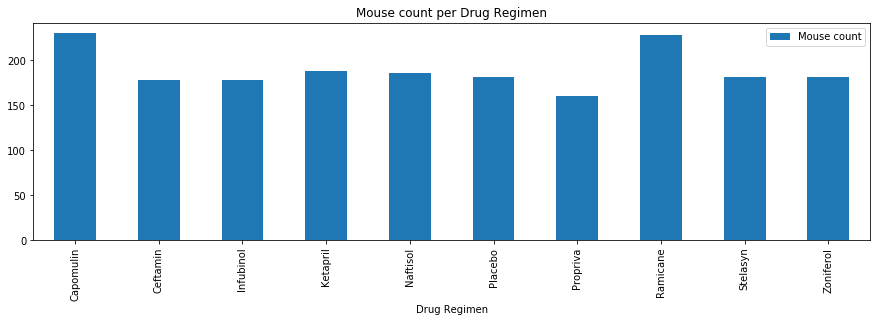

In [119]:
groupby_df = pd.DataFrame(new_data_table.groupby(["Drug Regimen"]).count()).reset_index()

Regimen = groupby_df[["Drug Regimen", "Mouse ID"]]
Regimen = Regimen.rename(columns={"Mouse ID": "Mouse count"})
Regimen = Regimen.set_index("Drug Regimen")

Regimen.plot.bar(figsize = (15, 4));
plt.title("Mouse count per Drug Regimen")
plt.show()


In [120]:
new_data_table.head()
regimen_list = summary_statistics.index.tolist()

In [121]:
regimen_count = (new_data_table.groupby(["Drug Regimen"])["Age_months"].count()).tolist()
regimen_count

[230, 178, 178, 188, 186, 181, 160, 228, 181, 182]

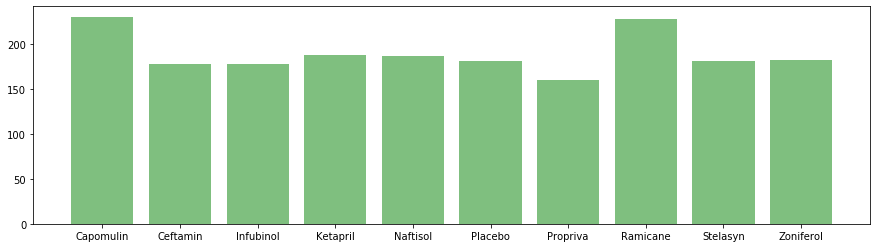

<Figure size 432x288 with 0 Axes>

In [122]:
x_axis = np.arange(len(regimen_count))
x_axis = regimen_list
plt.figure(figsize=(15,4))
plt.bar(x_axis, regimen_count, color='green', alpha=0.5, align="center")
plt.show()
plt.tight_layout()

## Pie Plots

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

In [79]:
gender = pd.DataFrame(new_data_table.groupby(["Sex"]).count()).reset_index()
gender.head()

,Sex,Mouse ID,Drug Regimen,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,Female,934,934,934,934,934,934,934
1,Male,958,958,958,958,958,958,958


In [85]:
gender = gender[["Sex","Mouse ID"]]
gender = gender.rename(columns={"Mouse ID": "Number of Mouse"})
gender.head()

,Sex,Number of Mouse
0,Female,934
1,Male,958


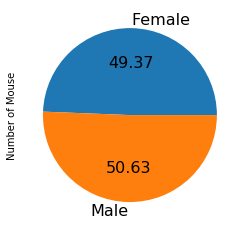

In [106]:
plt.figure(figsize = (10, 4))

axis_1 = plt.subplot(121, aspect = 'equal')
gender.plot(kind="pie", y = "Number of Mouse", ax=axis_1, autopct='%.2f', 
 startangle=0, shadow=False, labels=gender['Sex'], legend = False, fontsize=16)

In [107]:
plt.clf()
plt.cla()
plt.close()

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

([<matplotlib.patches.Wedge at 0x1fba22174c8>,
 [Text(-0.12838422997621635, -1.1931125217235021, 'Female'),
  Text(0.11768564654318275, 1.0936864672280229, 'Male')],
 [Text(-0.07489080081945954, -0.6959823043387094, '49.37'),
  Text(0.06419217084173605, 0.5965562548516488, '50.63')])

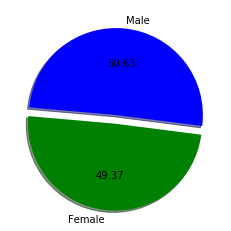

In [126]:
gender_count = (new_data_table.groupby(["Sex"])["Age_months"].count()).tolist()
gender_count

labels = ["Female", "Male"]
colors = ["green", "blue"]
explode = (0.1, 0)
plt.pie(gender_count, explode = explode, labels = labels, colors = colors, autopct ='%.2f', shadow = True, startangle = 175)

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 


In [141]:
new_data_table

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [132]:
sorted_df = new_data_table.sort_values(["Drug Regimen", "Mouse ID", "Timepoint"], ascending=True)

max_df = sorted_df.loc[sorted_df["Timepoint"] == 45]
max_df.reset_index()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,309,b128,Capomulin,Female,9,22,45,38.982878,2
1,299,b742,Capomulin,Male,7,21,45,38.939633,0
2,244,g288,Capomulin,Male,3,19,45,37.074024,1
3,360,g316,Capomulin,Female,22,22,45,40.159220,2
4,440,i557,Capomulin,Female,1,24,45,47.685963,1
...,...,...,...,...,...,...,...,...,...
125,1344,p136,Zoniferol,Female,5,28,45,63.488697,2
126,1416,q511,Zoniferol,Female,2,28,45,68.611061,3
127,1434,q633,Zoniferol,Male,12,25,45,70.827796,2
128,1518,s337,Zoniferol,Male,14,27,45,62.109651,4


In [133]:
capomulin = max_df[max_df["Drug Regimen"].isin(["Capomulin"])]
capomulin.reset_index()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,309,b128,Capomulin,Female,9,22,45,38.982878,2
1,299,b742,Capomulin,Male,7,21,45,38.939633,0
2,244,g288,Capomulin,Male,3,19,45,37.074024,1
3,360,g316,Capomulin,Female,22,22,45,40.159220,2
4,440,i557,Capomulin,Female,1,24,45,47.685963,1
5,204,i738,Capomulin,Female,23,20,45,37.311846,2
6,337,j119,Capomulin,Female,7,23,45,38.125164,1
7,380,l509,Capomulin,Male,17,21,45,41.483008,3
8,282,l897,Capomulin,Male,17,19,45,38.846876,1
9,39,m601,Capomulin,Male,22,17,45,28.430964,1


In [134]:
capomulin_list = capomulin.sort_values(["Tumor Volume (mm3)"], ascending = True).reset_index()
capomulin_list = capomulin_list["Tumor Volume (mm3)"]
capomulin_list

0     23.343598
1     28.430964
2     28.484033
3     31.023923
4     31.896238
5     32.377357
6     33.329098
7     34.455298
8     36.041047
9     37.074024
10    37.311846
11    38.125164
12    38.846876
13    38.939633
14    38.982878
15    40.159220
16    40.658124
17    40.728578
18    41.483008
19    41.581521
20    47.685963
Name: Tumor Volume (mm3), dtype: float64

In [137]:
quartiles = capomulin_list.quantile([.25,.5,.75])
lower_quartile = quartiles[0.25]
upper_quartile = quartiles[0.50]
iqr = upper_quartile - lower_quartile

print(f"The lower quartile of tumor volume is: {lower_quartile}")
print(f"The upper quartile of tumor volume is: {upper_quartile}")
print(f"The interquartile range of tumor volume is: {iqr}")
print(f"The the median of tumor volume is: {quartiles[0.5]} ")

lower_bound = lower_quartile - (1.5*iqr)
upper_bound = upper_quartile - (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_quartile} could be outliers")

The lower quartile of tumor volume is: 32.37735684
The upper quartile of tumor volume is: 37.31184577
The interquartile range of tumor volume is: 4.9344889300000006
The the median of tumor volume is: 37.31184577 
Values below 24.975623444999997 could be outliers.
Values above 37.31184577 could be outliers


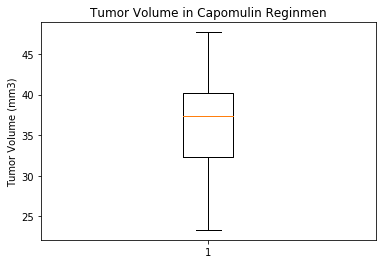

In [139]:
fig1, ax1 = plt.subplots()
ax1.set_title("Tumor Volume in Capomulin Reginmen")
ax1.set_ylabel("Tumor Volume (mm3)")
ax1.boxplot(capomulin_list)
plt.show()

In [146]:
ramicane = max_df[max_df['Drug Regimen'].isin(['Ramicane'])]
ramicane.reset_index()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,327,a411,Ramicane,Male,3,22,45,38.407618,1
1,430,a444,Ramicane,Female,10,25,45,43.047543,0
2,214,a520,Ramicane,Male,13,21,45,38.810366,1
3,174,a644,Ramicane,Female,7,17,45,32.978522,1
4,154,c758,Ramicane,Male,9,17,45,33.397653,1
5,272,d251,Ramicane,Female,8,19,45,37.311236,2
6,400,e662,Ramicane,Male,8,24,45,40.659006,2
7,49,g791,Ramicane,Male,11,16,45,29.128472,1
8,184,i177,Ramicane,Male,10,18,45,33.562402,3
9,254,i334,Ramicane,Female,8,20,45,36.374510,2


In [148]:
ramicane_list = ramicane.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
ramicane_list = ramicane_list["Tumor Volume (mm3)"]
ramicane_list

0     22.050126
1     29.128472
2     30.276232
3     30.564625
4     30.638696
5     31.095335
6     31.560470
7     32.978522
8     33.397653
9     33.562402
10    36.134852
11    36.374510
12    37.225650
13    37.311236
14    38.407618
15    38.810366
16    40.659006
17    40.667713
18    43.047543
19    45.220869
Name: Tumor Volume (mm3), dtype: float64

In [149]:
quartiles = ramicane_list.quantile([.25,.5,.75])
lower_quartile = quartiles[0.25]
upper_quartile = quartiles[0.50]
iqr = upper_quartile - lower_quartile

print(f"The lower quartile of tumor volume is: {lower_quartile}")
print(f"The upper quartile of tumor volume is: {upper_quartile}")
print(f"The interquartile range of tumor volume is: {iqr}")
print(f"The the median of tumor volume is: {quartiles[0.5]} ")

lower_bound = lower_quartile - (1.5*iqr)
upper_bound = upper_quartile - (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_quartile} could be outliers")

The lower quartile of tumor volume is: 30.981175224999998
The upper quartile of tumor volume is: 34.848627300000004
The interquartile range of tumor volume is: 3.8674520750000063
The the median of tumor volume is: 34.848627300000004 
Values below 25.17999711249999 could be outliers.
Values above 34.848627300000004 could be outliers


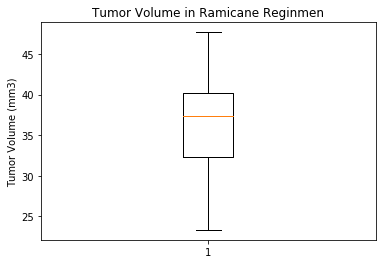

In [150]:
fig1, ax1 = plt.subplots()
ax1.set_title("Tumor Volume in Ramicane Reginmen")
ax1.set_ylabel("Tumor Volume (mm3)")
ax1.boxplot(capomulin_list)
plt.show()

In [152]:
infubinol = max_df[max_df['Drug Regimen'].isin(['Infubinol'])]
infubinol.reset_index()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,463,a203,Infubinol,Female,20,23,45,67.973419,2
1,473,a251,Infubinol,Female,21,25,45,65.525743,1
2,540,a685,Infubinol,Male,8,30,45,66.083066,3
3,637,c139,Infubinol,Male,11,28,45,72.226731,2
4,800,e476,Infubinol,Male,23,26,45,62.435404,1
5,834,f345,Infubinol,Male,23,26,45,60.918767,1
6,1053,k483,Infubinol,Female,20,30,45,66.196912,3
7,1813,y163,Infubinol,Female,17,27,45,67.685569,3
8,1872,z581,Infubinol,Female,24,25,45,62.754451,3


In [153]:
infubinol_list = infubinol.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
infubinol_list = infubinol_list["Tumor Volume (mm3)"]
infubinol_list

0    60.918767
1    62.435404
2    62.754451
3    65.525743
4    66.083066
5    66.196912
6    67.685569
7    67.973419
8    72.226731
Name: Tumor Volume (mm3), dtype: float64

In [ ]:
quartiles = infubinol_list.quantile([.25,.5,.75])
lower_quartile = quartiles[0.25]
upper_quartile = quartiles[0.50]
iqr = upper_quartile - lower_quartile

print(f"The lower quartile of tumor volume is: {lower_quartile}")
print(f"The upper quartile of tumor volume is: {upper_quartile}")
print(f"The interquartile range of tumor volume is: {iqr}")
print(f"The the median of tumor volume is: {quartiles[0.5]} ")

lower_bound = lower_quartile - (1.5*iqr)
upper_bound = upper_quartile - (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_quartile} could be outliers")

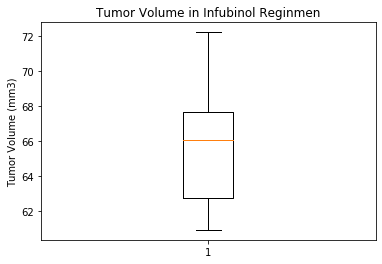

In [155]:
fig1, ax1 = plt.subplots()
ax1.set_title("Tumor Volume in Infubinol Reginmen")
ax1.set_ylabel("Tumor Volume (mm3)")
ax1.boxplot(infubinol_list)
plt.show()

In [156]:
ceftamin = max_df[max_df['Drug Regimen'].isin(['Ceftamin'])]
ceftamin.reset_index()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,493,a275,Ceftamin,Female,20,28,45,62.999356,3
1,993,j296,Ceftamin,Female,24,30,45,61.849023,3
2,1033,k210,Ceftamin,Male,15,28,45,68.923185,3
3,1112,l471,Ceftamin,Female,7,28,45,67.748662,1
4,1132,l661,Ceftamin,Male,18,26,45,59.851956,3
5,1162,l733,Ceftamin,Female,4,30,45,64.299830,1
6,1260,o287,Ceftamin,Male,2,28,45,59.741901,4
7,1379,p438,Ceftamin,Female,11,26,45,61.433892,1
8,1670,w151,Ceftamin,Male,24,25,45,67.527482,3
9,1773,x581,Ceftamin,Female,19,28,45,64.634949,3


In [157]:
ceftamin_list = ceftamin.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
ceftamin_list  = ceftamin_list ["Tumor Volume (mm3)"]
ceftamin_list

0     59.741901
1     59.851956
2     61.386660
3     61.433892
4     61.849023
5     62.999356
6     64.299830
7     64.634949
8     64.729837
9     67.527482
10    67.748662
11    68.594745
12    68.923185
Name: Tumor Volume (mm3), dtype: float64

In [158]:
quartiles = ceftamin_list.quantile([.25,.5,.75])
lower_quartile = quartiles[0.25]
upper_quartile = quartiles[0.50]
iqr = upper_quartile - lower_quartile

print(f"The lower quartile of tumor volume is: {lower_quartile}")
print(f"The upper quartile of tumor volume is: {upper_quartile}")
print(f"The interquartile range of tumor volume is: {iqr}")
print(f"The the median of tumor volume is: {quartiles[0.5]} ")

lower_bound = lower_quartile - (1.5*iqr)
upper_bound = upper_quartile - (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_quartile} could be outliers")

The lower quartile of tumor volume is: 61.43389223
The upper quartile of tumor volume is: 64.29983003
The interquartile range of tumor volume is: 2.8659377999999975
The the median of tumor volume is: 64.29983003 
Values below 57.13498553 could be outliers.
Values above 64.29983003 could be outliers


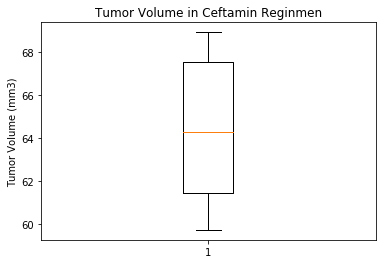

In [159]:
fig1, ax1 = plt.subplots()
ax1.set_title("Tumor Volume in Ceftamin Reginmen")
ax1.set_ylabel("Tumor Volume (mm3)")
ax1.boxplot(ceftamin_list)
plt.show()

## Line and Scatter Plots

In [165]:
capomulin_df = new_data_table.loc[new_data_table["Drug Regimen"] == "Capomulin"]
capomulin_df = capomulin_df.reset_index()
capomulin_df

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,10,s185,Capomulin,Female,3,17,0,45.000000,0
1,11,s185,Capomulin,Female,3,17,5,43.878496,0
2,12,s185,Capomulin,Female,3,17,10,37.614948,0
3,13,s185,Capomulin,Female,3,17,15,38.177232,0
4,14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...,...
225,440,i557,Capomulin,Female,1,24,45,47.685963,1
226,1452,r157,Capomulin,Male,22,25,0,45.000000,0
227,1453,r157,Capomulin,Male,22,25,5,45.597064,0
228,1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [169]:
single_mouse = capomulin_df.loc[capomulin_df["Mouse ID"] == "i557"]
single_mouse 

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
216,431,i557,Capomulin,Female,1,24,0,45.000000,0
217,432,i557,Capomulin,Female,1,24,5,42.261665,0
218,433,i557,Capomulin,Female,1,24,10,42.992077,0
219,434,i557,Capomulin,Female,1,24,15,43.529876,0
220,435,i557,Capomulin,Female,1,24,20,43.967895,0
221,436,i557,Capomulin,Female,1,24,25,44.596219,0
222,437,i557,Capomulin,Female,1,24,30,45.261384,0
223,438,i557,Capomulin,Female,1,24,35,45.941949,0
224,439,i557,Capomulin,Female,1,24,40,46.821070,1
225,440,i557,Capomulin,Female,1,24,45,47.685963,1


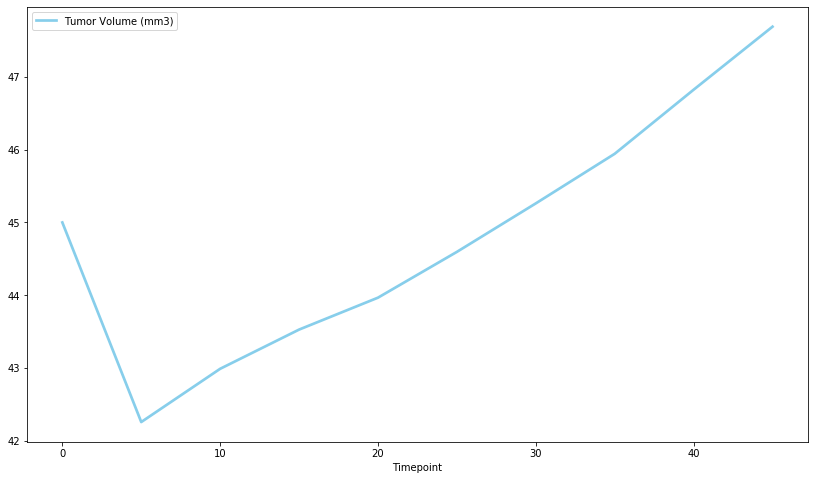

In [173]:
single_mouse = single_mouse.loc[:, ["Timepoint", "Tumor Volume (mm3)"]]
single_mouse = single_mouse.reset_index(drop=True)
single_mouse.set_index("Timepoint").plot(figsize=(14, 8), linewidth = 2.7, color = "skyblue")

In [16]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

In [194]:
weight_df = capomulin_df.loc[:,["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]
weight_df

,Mouse ID,Weight (g),Tumor Volume (mm3)
0,s185,17,45.000000
1,s185,17,43.878496
2,s185,17,37.614948
3,s185,17,38.177232
4,s185,17,36.866876
...,...,...,...
225,i557,24,47.685963
226,r157,25,45.000000
227,r157,25,45.597064
228,r157,25,46.059608


In [201]:
capomulin_average = pd.DataFrame(weight_df.groupby(["Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"].mean()).reset_index()
capomulin_average

,Mouse ID,Weight (g),Tumor Volume (mm3)
0,b128,22,41.963636
1,b742,21,40.083699
2,f966,17,36.505973
3,g288,19,41.990097
4,g316,22,44.613344
5,i557,24,44.805810
6,i738,20,39.141053
7,j119,23,44.465236
8,j246,21,43.216925
9,l509,21,44.434474


In [202]:
capomulin_average = capomulin_average.set_index("Mouse ID")

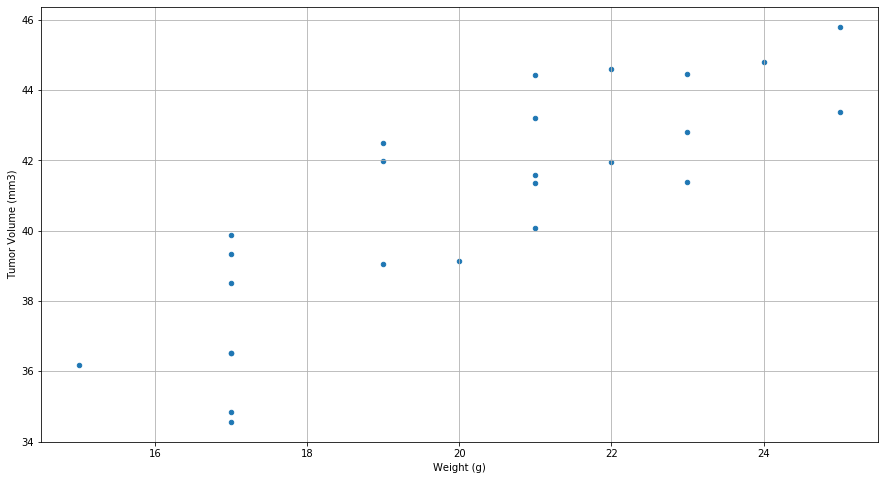

In [208]:
capomulin_average.plot(kind="scatter", x="Weight (g)", y="Tumor Volume (mm3)", grid = True, figsize=(15,8))

plt.show()

## Correlation and Regression

In [17]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
